In [1]:
# packages for making the maps
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# packages for creating and displaying the .gif
import imageio
import visvis as vv


In [2]:
# set the filepath and load in a shapefile
fp = "C:\\Users\\Brian\\Desktop\\COS 497 - GIS\\US Climate Metrics\\climate_div.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,AREA,PERIMETER,CLIMDIV_,CLIMDIV_ID,CDIV_,NAME,ST,SEQ_,ST_,DIV_,PRE_MEAN,PRE_STD,TMP_MEAN,TMP_STD,PCT,STDIV,COLOR,geometry
0,4.375,11.398,2,17,142,NORTH CENTRAL,MN,142,21,2,25.145,3.963,38.743,1.197,0.0,21002,23,"POLYGON ((-95.19209 48.99832, -95.16285 49.001..."
1,2.976,17.314,3,2,313,E OLYMPIC CASCADE FOOTHLS,WA,313,45,4,63.426,9.234,49.657,0.975,0.0,45004,23,"POLYGON ((-121.79560 49.04077, -121.80126 48.9..."
2,2.304,8.331,4,20,217,NORTH CENTRAL,ND,182,32,2,16.820,3.276,38.670,1.457,0.0,32002,23,"POLYGON ((-101.49662 49.04107, -100.69427 49.0..."
3,3.051,9.196,5,18,216,NORTHWEST,ND,181,32,1,15.635,3.710,39.364,1.575,0.0,32001,23,"POLYGON ((-104.05603 49.00354, -101.49662 49.0..."
4,2.065,12.090,6,3,314,CASCADE MOUNTAINS WEST,WA,314,45,5,91.146,15.240,43.624,1.252,0.0,45005,23,"POLYGON ((-120.76775 49.02679, -120.73124 48.9..."


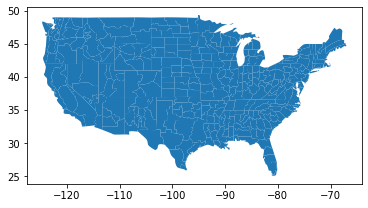

In [3]:
map_df.plot()

In [4]:
df_1895 = pd.read_csv("C:\\Users\\Brian\\Desktop\\COS 497 - GIS\\US Climate Metrics\\110-tavg-189606-12.csv", header=0)
df_1960 = pd.read_csv("C:\\Users\\Brian\\Desktop\\COS 497 - GIS\\US Climate Metrics\\110-tavg-196006-12.csv", header=0)
df_2019 = pd.read_csv("C:\\Users\\Brian\\Desktop\\COS 497 - GIS\\US Climate Metrics\\110-tavg-201906-12.csv", header=0)

In [5]:
# select only the columns that we want for the map
all_years_df = pd.concat([df_1895['CDIV_'],
                          df_1895['Anomaly (1901-2000 base period)'],
                          df_1960['Anomaly (1901-2000 base period)'],
                          df_2019['Anomaly (1901-2000 base period)']],
                         axis=1)
    
# rename the columns
all_years_df.columns = ['CDIV_',
                        '1895 Average Annual Temperature Anomaly (°F)',
                        '1960 Average Annual Temperature Anomaly (°F)',
                        '2019 Average Annual Temperature Anomaly (°F)']

all_years_df.head()

,CDIV_,1895 Average Annual Temperature Anomaly (°F),1960 Average Annual Temperature Anomaly (°F),2019 Average Annual Temperature Anomaly (°F)
0,1,0.2,-1.4,1.8
1,2,0.1,-1.2,1.9
2,3,0.2,-1.4,1.6
3,4,0.0,-1.0,2.2
4,5,0.2,-0.9,2.0


In [6]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('CDIV_').join(all_years_df.set_index('CDIV_'))

merged.sort_values('CDIV_', ascending=False).head()

,AREA,PERIMETER,CLIMDIV_,CLIMDIV_ID,NAME,ST,SEQ_,ST_,DIV_,PRE_MEAN,PRE_STD,TMP_MEAN,TMP_STD,PCT,STDIV,COLOR,geometry,1895 Average Annual Temperature Anomaly (°F),1960 Average Annual Temperature Anomaly (°F),2019 Average Annual Temperature Anomaly (°F)
CDIV_,,,,,,,,,,,,,,,,,,,,
344,4.199,9.635,120,133,UPPER PLATTE,WY,344,48,10,11.573,1.846,41.437,0.992,0.0,48010,23,"POLYGON ((-109.08768 42.67994, -109.04269 42.6...",-2.1,0.1,0.5
343,2.274,7.735,96,102,WIND RIVER,WY,343,48,9,9.439,2.107,43.714,1.280,0.0,48009,22,"POLYGON ((-109.87674 43.93095, -109.85274 43.9...",-1.0,-0.1,-0.1
342,3.482,10.470,113,126,LOWER PLATTE,WY,342,48,8,13.630,2.601,46.392,1.087,0.0,48008,23,"POLYGON ((-107.44063 42.86396, -107.40063 42.8...",-0.9,-0.3,0.0
341,1.999,6.303,89,106,CHEYENNE & NIOBRARA DRNG.,WY,341,48,7,13.566,2.480,45.553,1.151,0.0,48007,23,"POLYGON ((-105.78419 43.74448, -105.74357 43.7...",-1.5,-0.5,-1.6
340,1.210,5.372,71,82,BELLE FOURCHE DRAINAGE,WY,340,48,6,16.199,2.991,44.253,1.210,0.0,48006,23,"POLYGON ((-104.29821 45.00328, -104.05984 44.9...",-1.0,-0.6,-1.7


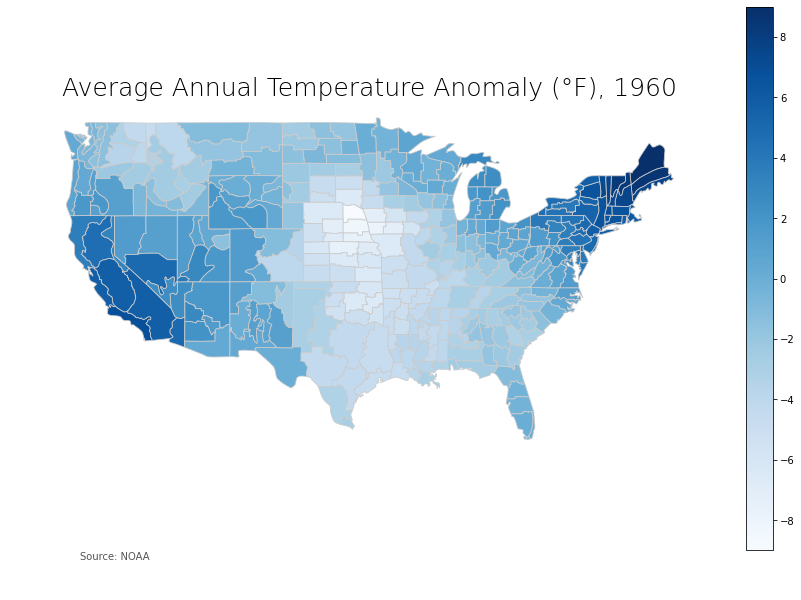

In [7]:
# set a variable that will call whatever column we want to visualise on the map
variable = '1960 Average Annual Temperature Anomaly (°F)'

# set the range for the choropleth
vmin, vmax = -9, 9

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Average Annual Temperature Anomaly (°F), 1960', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: NOAA',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)

In [8]:
# save all the maps in the charts folder
output_path = 'C:\\Users\\Brian\\Desktop\\COS 497 - GIS\\US Climate Metrics\\maps\\'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = ['1895', '1960', '2019']

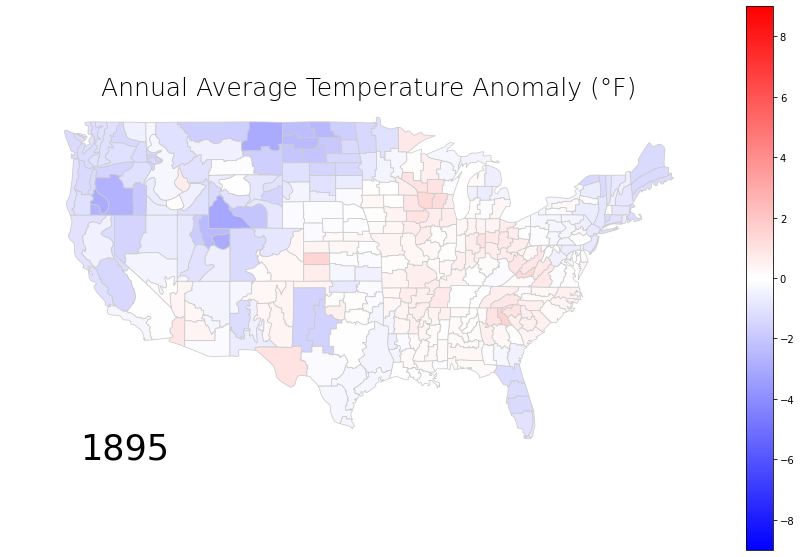

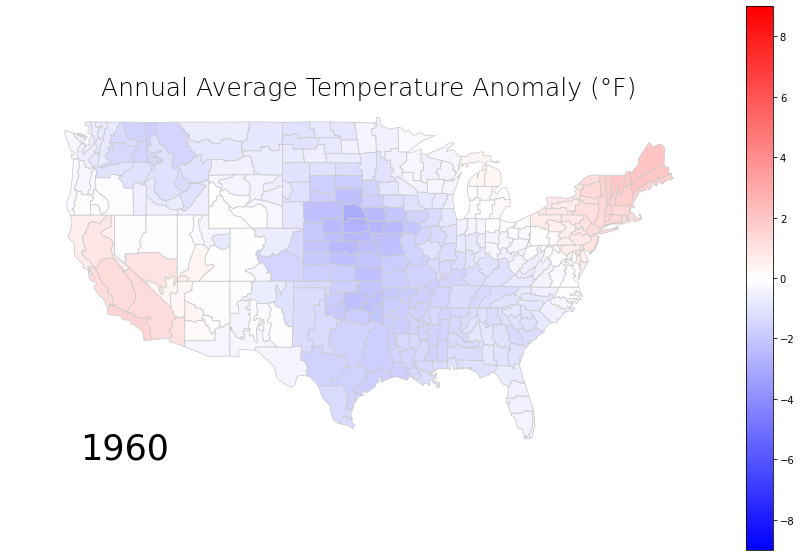

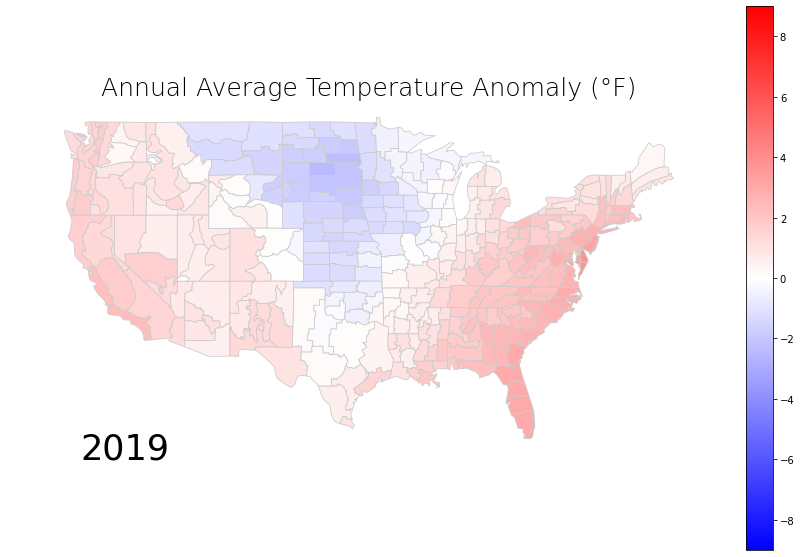

In [9]:


# create one map per year
map_images = []

for year in list_of_years:
    
    fig = merged.plot(column=year + ' Average Annual Temperature Anomaly (°F)',
                      cmap='bwr',
                      figsize=(15, 10),
                      linewidth=0.8,
                      edgecolor='0.8',
                      vmin=vmin,
                      vmax=vmax,
                      legend=True,
                      norm=plt.Normalize(vmin=vmin, vmax=vmax)) # plt.Normalize keeps the legend range the same for all maps
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Annual Average Temperature Anomaly (°F)', \
            fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # position an annotation to the bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # save the figure as a jpg in the output path
    filepath = os.path.join(output_path, year + '_annual_avg_temp.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=75)
    map_images.append(imageio.imread(filepath))  # adds the map to an array as one frame of the animated .gif

In [11]:
# combines the images into an animated .gif
from IPython.display import display, HTML

imageio.mimwrite('C:\\Users\\Brian\\Desktop\\COS 497 - GIS\\US Climate Metrics\\maps\\animated_map.gif',
                map_images,
                duration=0.6)


HTML('''<div style="display: flex; justify-content: row;">
    <img src="https://raw.githubusercontent.com/BrianTibbetts/US-Climate-Time-Series/main/animated_map.gif">
</div>''')